#[PANDASAI](https://github.com/gventuri/pandas-ai) : A generative AI capabilities to Pandas Dataframes



## Supported Models

The Pandasai API currently supports several models, and it is continuously being developed with the possibility of adding more models in the future. The supported models include:

1. ChatGPT by OpenAI
2. StarCoder by Huggingface
3. Azure ChatGPT API
4. OpenAI Assistant
5. Google PaLM

These models can be utilized in a conversational form, allowing users to interact with them effectively.

To facilitate the usage of these models, this tutorial provides guidance on running them using Google Colab. Google Colab is a platform that enables straightforward onboarding and provides a Google Colab Notebook, which simplifies the process of getting started.

By leveraging the provided Google Colab Notebook, users can easily run the supported models within a conversational context, enhancing the overall interactive experience and enabling efficient data analysis.

Please note that as the Pandasai API evolves, additional models may be incorporated, expanding the range of options available to users.

## Learning Objectives:
This tutorial aims to help you achieve the following learning objectives:

1. Install the pandasai library.
2. Set up the API_TOKEN using either the OpenAI platform or the Hugging Face platform.
3. Explore and run basic functionalities provided by pandasai.
4. Execute examples using pandasai with predefined prompts for experimentation.

Please note that while the OpenAI platform is not free, it is still reasonably priced for running a few queries. On the other hand, the StartCoder model by Hugging Face is available for personal use at no cost.


## Prerequisites
Before proceeding with this tutorial, make sure you meet the following prerequisites:

1. Basic understanding of Python, Pandas, and APIs for generative models.
2. Obtain API tokens from the openai platform and/or Hugging Face, depending on the models you intend to use.
3. Demonstrated eagerness to learn and develop your skills.

Having a foundational knowledge of Python, Pandas, and generative models APIs will be beneficial for understanding the concepts covered in this tutorial. Additionally, acquiring the necessary API tokens from the respective platforms will enable you to interact with the models effectively.

It's important to approach this tutorial with a positive attitude and a willingness to learn and improve your skills. Through active participation and a growth mindset, you will be able to make the most of this learning opportunity.

# Getting Started

Installing `Pandasai` is pretty striaght forward using `pip`. The recent releases are hosted on [Pnadasai Pypi](https://pypi.org/project/pandasai/) page. Always check the version, you are going to install. Make sure, check out the [Issues](https://github.com/gventuri/pandas-ai/issues) page of its GitHub Reporistry for any problems you face.  

In [ ]:
!pip install --upgrade pandas pandasai

Now we import the dependencies:

## Generate OPENAI API Token

Users are required to generate `YOUR_API_TOKEN`. Follow below simple steps to generate your API_TOKEN with 
[openai](https://platform.openai.com/overview).

1. Go to  https://openai.com/api/ and signup with your email address or connect your Google Account.
2. Go to View API Keys on left side of your Personal Account Settings
3. Select Create new Secret key

> The API access to openai is a paid service. You have to set up billing. 
>Read the [Pricing](https://platform.openai.com/docs/quickstart/pricing) information before experimenting.

## Generate HUGGING FACE PLATFORM API Token

It will take around 2 mins to generate API token.

Users are required to generate `YOUR_API_TOKEN`. Follow below simple steps to generate your API_TOKEN with [Hugging Face](https://huggingface.co/).

1. Go to  https://huggingface.co/ and signup with your email address or connect your Google Account.
2. Go to https://huggingface.co/settings/tokens and generate User Access Token.
3. Copy and Save securely for Personal Use

> Hugging Face API keys are FREE for personal / educational use.

In [ ]:
# Import basis libraries
import pandas as pd
import pandasai as pdai
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from pandasai.llm.open_assistant import OpenAssistant
from pandasai.llm.starcoder import Starcoder

In [ ]:
# Define List of Models
models = {
    "OpenAI": OpenAI,
    "Starcoder": Starcoder,
    "Open-Assistant": OpenAssistant
}


In [ ]:
#@title Select Model to Run
model_to_run = 'OpenAI' #@param ["OpenAI", "Starcoder", "Open-Assistant"]
print(f"Enter API for {model_to_run} platform")

Enter API for OpenAI platform


In [ ]:
# Enter API Key
API_KEY = '' #@param {type:"string"}

We create a dataframe using pandas:

In [ ]:
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [21400000, 2940000, 2830000, 3870000, 2160000, 1350000, 1780000, 1320000, 516000, 14000000],
    "happiness_index": [7.3, 7.2, 6.5, 7.0, 6.0, 6.3, 7.3, 7.3, 5.9, 5.0]
})

After loading the Dataframe and input of Prompt, now we are ready to run the Prompt with given dataframe and query. As a first setp, we instantiate the llm model with selected option. In order to understand, what is going under the hood, we set `verbose=True`. Let us run now!

In [ ]:
# Model Initialisation
llm = models[model_to_run](api_token=API_KEY)
pandas_ai = PandasAI(llm, conversational=False, verbose=True)


In [ ]:
# Enter Prompt related to data or Select from Pre-defined for demo purposes.
prompt = 'Plot the histogram of countries showing for each the gpd, using different colors for each bar' #@param [ "What is the relation between GDP and Happines Index", "Plot the histogram of countries showing for each the gpd, using different colors for each bar", "GDP of Top 5 Happiest Countries?"]  {allow-input: true}


Running PandasAI with openai LLM...

Code generated:
```
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown', 'gray', 'olive', 'cyan']
plt.bar(df['country'], df['gdp'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP by Country')
plt.show()
```

Code running:
```
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown',
    'gray', 'olive', 'cyan']
plt.bar(df['country'], df['gdp'], color=colors)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('GDP')
plt.title('GDP by Country')
plt.show()
```


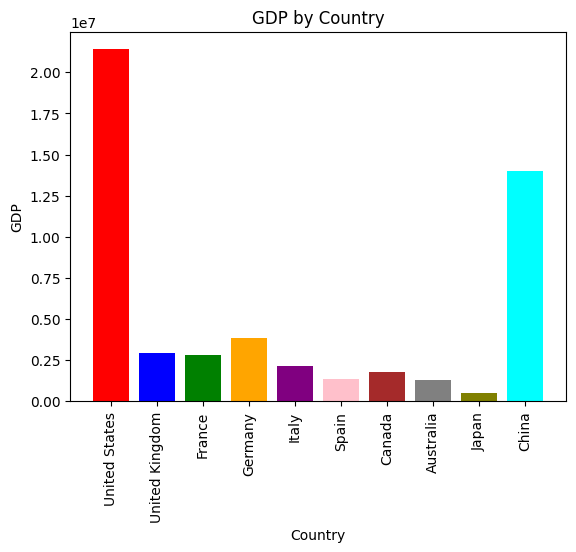

Answer: 


In [ ]:
response = pandas_ai.run(df, prompt=prompt,
                          is_conversational_answer=False)

As you can see from above experiments, having `verbose=True`, we can see the code generated by LLMs API and then this code is run to produce and answer on complete dataset. 

## Play Around

Users can play around various questions about the tiny dataset we generated above. Using this notebook, you can select between Model Options and ask questions based on your problem.

## More Examples

In above section, we showed a little demo with small dataframe. Usually data is stored in `.csv` , .=`.xlsx` and other formats. `Pandasai` treats any data uploaded as Pandas dataframe and proceed accordingly. 

In this section, we include some of the [examples](https://github.com/gventuri/pandas-ai/tree/main/examples) shipped with `pandasai` reporsitory.


In [ ]:
#Loading CSV file 
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)

In [ ]:
llm = OpenAI(api_token=API_KEY)
pandas_ai = PandasAI(llm, verbose=True)

In [ ]:
# Enter Prompt related to data or Select from Pre-defined for demo purposes.

prompt = 'Generate bar Plot of Loans Paid by Men & Women' #@param [ "How many loans are from Women that have been paid off?", "Generate bar Plot of Loans Paid by Men & Women"]  {allow-input: true}

Running PandasAI with openai LLM...

Code generated:
```
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_csv('loan_data.csv')

# Filter the dataframe to only include paid off loans
paid_off_df = df[df['loan_status'] == 'PAIDOFF']

# Group the dataframe by gender and loan status
gender_grouped_df = paid_off_df.groupby(['Gender', 'loan_status']).count()['Loan_ID']

# Create a bar plot
gender_grouped_df.plot(kind='bar')

# Set the title and axis labels
plt.title('Loans Paid by Men & Women')
plt.xlabel('Gender, Loan Status')
plt.ylabel('Number of Loans')

# Show the plot
plt.show()
```

Code running:
```
paid_off_df = df[df['loan_status'] == 'PAIDOFF']
gender_grouped_df = paid_off_df.groupby(['Gender', 'loan_status']).count()[
    'Loan_ID']
gender_grouped_df.plot(kind='bar')
plt.title('Loans Paid by Men & Women')
plt.xlabel('Gender, Loan Status')
plt.ylabel('Number of Loans')
plt.show()
```


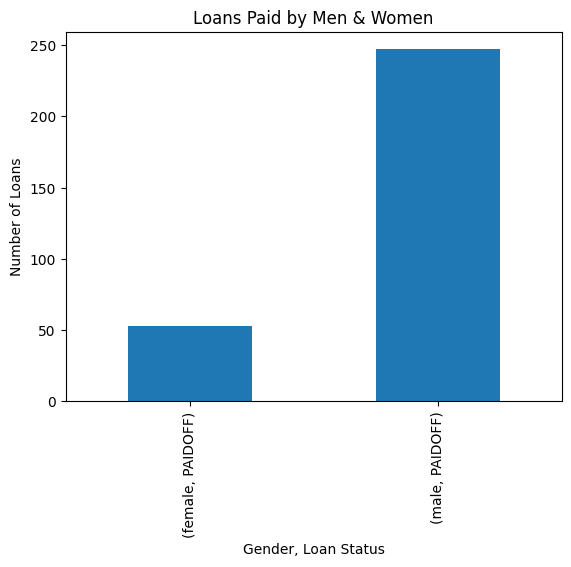

Answer: 
Conversational answer: Sure, I can help you with that! To generate a bar plot of loans paid by men and women, we can use a data visualization tool like Matplotlib or Seaborn in Python. We'll need to have a dataset that includes information on the loan amounts paid by both men and women. Once we have that, we can create a bar plot with two bars - one for men and one for women - and the height of each bar will represent the total loan amount paid by that gender. This will give us a visual representation of the difference in loan payments between men and women.


In [ ]:
response = pandas_ai.run(df, prompt = prompt)

In [ ]:
#Let us run the code ourselves and find out the results matches or not?
import pandas as pd
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)
num_loans = len(df[(df['Gender'] == 'male') & (df['loan_status'] == 'PAIDOFF')]
    )
print(num_loans)

247


In [ ]:
import pandas as pd
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)
num_loans = len(df[(df['Gender'] == 'female') & (df['loan_status'] == 'PAIDOFF')]
    )
print(num_loans)

53


The answers generated by Pandas AI and manually are same. However, it may not be a case always. 


# Remarks
In this concise tutorial, we have explored the Pandasai Library and gained insight into its higher-level architecture. This library offers a convenient solution for individuals to inquire about their data without the need to train in-house Large Language Models (LLMs) on company data. While there are various potential applications for this tool, it's important to remain mindful that the generated code by LLMs may occasionally produce unexpected outputs.

It's worth emphasizing that Pandas AI is an actively developed project, indicating ongoing efforts to improve and enhance its functionality. With dedicated contributors, exciting features are being developed and added to this library.

> **Stay tuned! There's more to come in the world of Pandas AI as it evolves and continues to empower users in their data exploration and analysis endeavors.**
